In [ ]:
# Pandas is used for data manipulation
import pandas as pd

# Use numpy to convert to arrays
import numpy as np

# Import tools needed for visualization
from sklearn.tree import export_graphviz
import seaborn as sns
import pydot
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from skimage import io
from skimage import feature

import matplotlib.pyplot as plt

import cv2
from numpy import inf

In [72]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Preview of Data**

In [73]:
##### LOAD CSV DATASET
dataset = pd.read_csv('/content/drive/MyDrive/TUGAS AKHIR/archive/dataset_tahu_berfomalin_yud.csv')
print(dataset.shape)
print(dataset.head)

(45000, 9)
<bound method NDFrame.head of        H2_MQ2(ppm)  LPG_MQ2(ppm)  CO_MQ2(ppm)  Alcohol_MQ2(ppm)  \
0              1.6           0.8          3.7               1.3   
1              1.6           0.8          3.7               1.3   
2              1.6           0.8          3.7               1.3   
3              1.6           0.8          3.7               1.3   
4              1.6           0.8          3.7               1.3   
...            ...           ...          ...               ...   
44995          1.7           0.8          4.0               1.4   
44996          1.7           0.8          4.0               1.4   
44997          1.7           0.8          4.0               1.4   
44998          1.8           0.9          4.2               1.5   
44999          1.7           0.8          4.0               1.4   

       Propane_MQ2(ppm)  CH4_MQ4(ppm)  Smoke_MQ4(ppm)  Temperature(C)  label  
0                   1.1           0.7             0.0               1      

In [74]:
col_names = dataset.columns

col_names

Index(['H2_MQ2(ppm)', 'LPG_MQ2(ppm)', 'CO_MQ2(ppm)', 'Alcohol_MQ2(ppm)',
       'Propane_MQ2(ppm)', 'CH4_MQ4(ppm)', 'Smoke_MQ4(ppm)', 'Temperature(C)',
       'label'],
      dtype='object')

In [75]:
dataset.columns = dataset.columns.str.strip()
dataset.columns
dataset['label'].value_counts()

0    23141
1    21859
Name: label, dtype: int64

In [76]:
dataset['label'].value_counts()/np.float(len(dataset))

<ipython-input-76-353b681c6ca2>:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dataset['label'].value_counts()/np.float(len(dataset))


0    0.514244
1    0.485756
Name: label, dtype: float64

In [77]:
dataset['label'] = dataset['label'].astype(np.int64)

In [78]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   H2_MQ2(ppm)       45000 non-null  float64
 1   LPG_MQ2(ppm)      45000 non-null  float64
 2   CO_MQ2(ppm)       45000 non-null  float64
 3   Alcohol_MQ2(ppm)  45000 non-null  float64
 4   Propane_MQ2(ppm)  45000 non-null  float64
 5   CH4_MQ4(ppm)      45000 non-null  float64
 6   Smoke_MQ4(ppm)    45000 non-null  float64
 7   Temperature(C)    45000 non-null  int64  
 8   label             45000 non-null  int64  
dtypes: float64(7), int64(2)
memory usage: 3.1 MB


In [79]:
dataset.isnull().sum()

H2_MQ2(ppm)         0
LPG_MQ2(ppm)        0
CO_MQ2(ppm)         0
Alcohol_MQ2(ppm)    0
Propane_MQ2(ppm)    0
CH4_MQ4(ppm)        0
Smoke_MQ4(ppm)      0
Temperature(C)      0
label               0
dtype: int64

In [80]:
round(dataset.describe(),2)

,H2_MQ2(ppm),LPG_MQ2(ppm),CO_MQ2(ppm),Alcohol_MQ2(ppm),Propane_MQ2(ppm),CH4_MQ4(ppm),Smoke_MQ4(ppm),Temperature(C),label
count,45000.00,45000.00,45000.00,45000.00,45000.00,45000.00,45000.00,45000.0,45000.00
mean,1.52,0.74,3.32,1.19,0.99,3.17,5.75,1.0,0.49
std,0.14,0.08,0.43,0.14,0.09,2.89,21.86,0.0,0.50
min,1.00,0.50,1.90,0.70,0.70,0.70,0.00,1.0,0.00
25%,1.40,0.70,3.10,1.10,0.90,1.80,0.20,1.0,0.00
50%,1.50,0.70,3.40,1.20,1.00,2.30,0.40,1.0,0.00
75%,1.60,0.80,3.60,1.30,1.00,3.20,1.00,1.0,1.00
max,1.90,0.90,4.50,1.50,1.20,20.40,262.80,1.0,1.00


Text(0, 0.5, 'Temperature(C)')

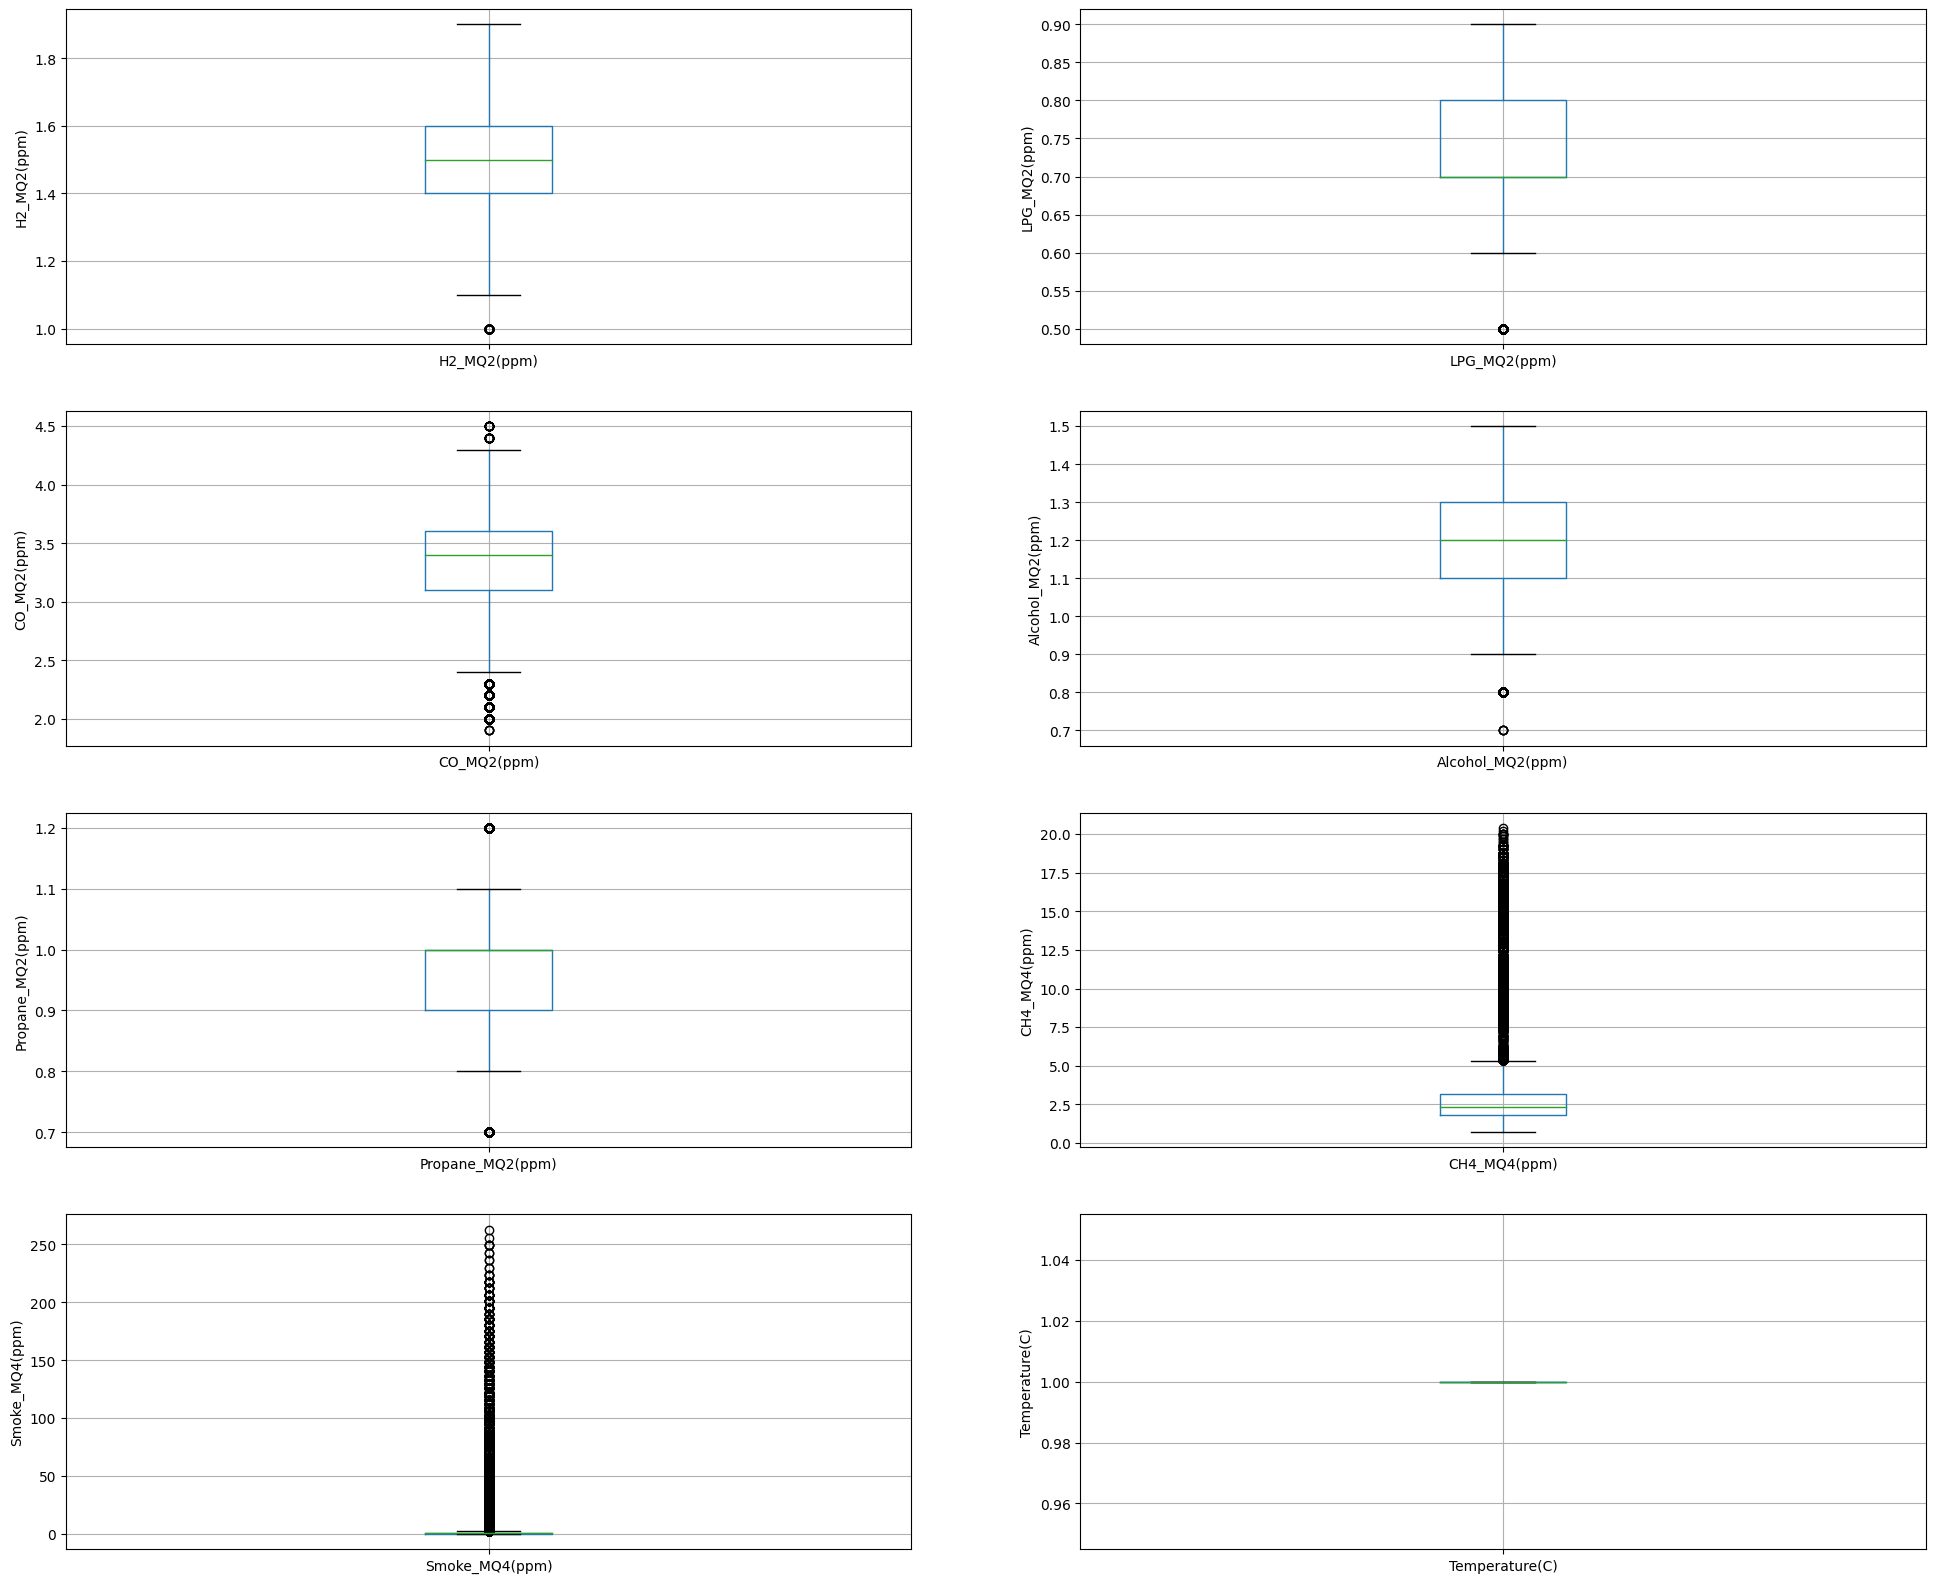

In [81]:
# draw boxplots to visualize outliers

plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = dataset.boxplot(column='H2_MQ2(ppm)')
fig.set_title('')
fig.set_ylabel('H2_MQ2(ppm)')


plt.subplot(4, 2, 2)
fig = dataset.boxplot(column='LPG_MQ2(ppm)')
fig.set_title('')
fig.set_ylabel('LPG_MQ2(ppm)')


plt.subplot(4, 2, 3)
fig = dataset.boxplot(column='CO_MQ2(ppm)')
fig.set_title('')
fig.set_ylabel('CO_MQ2(ppm)')


plt.subplot(4, 2, 4)
fig = dataset.boxplot(column='Alcohol_MQ2(ppm)')
fig.set_title('')
fig.set_ylabel('Alcohol_MQ2(ppm)')


plt.subplot(4, 2, 5)
fig = dataset.boxplot(column='Propane_MQ2(ppm)')
fig.set_title('')
fig.set_ylabel('Propane_MQ2(ppm)')


plt.subplot(4, 2, 6)
fig = dataset.boxplot(column='CH4_MQ4(ppm)')
fig.set_title('')
fig.set_ylabel('CH4_MQ4(ppm)')


plt.subplot(4, 2, 7)
fig = dataset.boxplot(column='Smoke_MQ4(ppm)')
fig.set_title('')
fig.set_ylabel('Smoke_MQ4(ppm)')


plt.subplot(4, 2, 8)
fig = dataset.boxplot(column='Temperature(C)')
fig.set_title('')
fig.set_ylabel('Temperature(C)')

Text(0, 0.5, 'Number of pulsar stars')

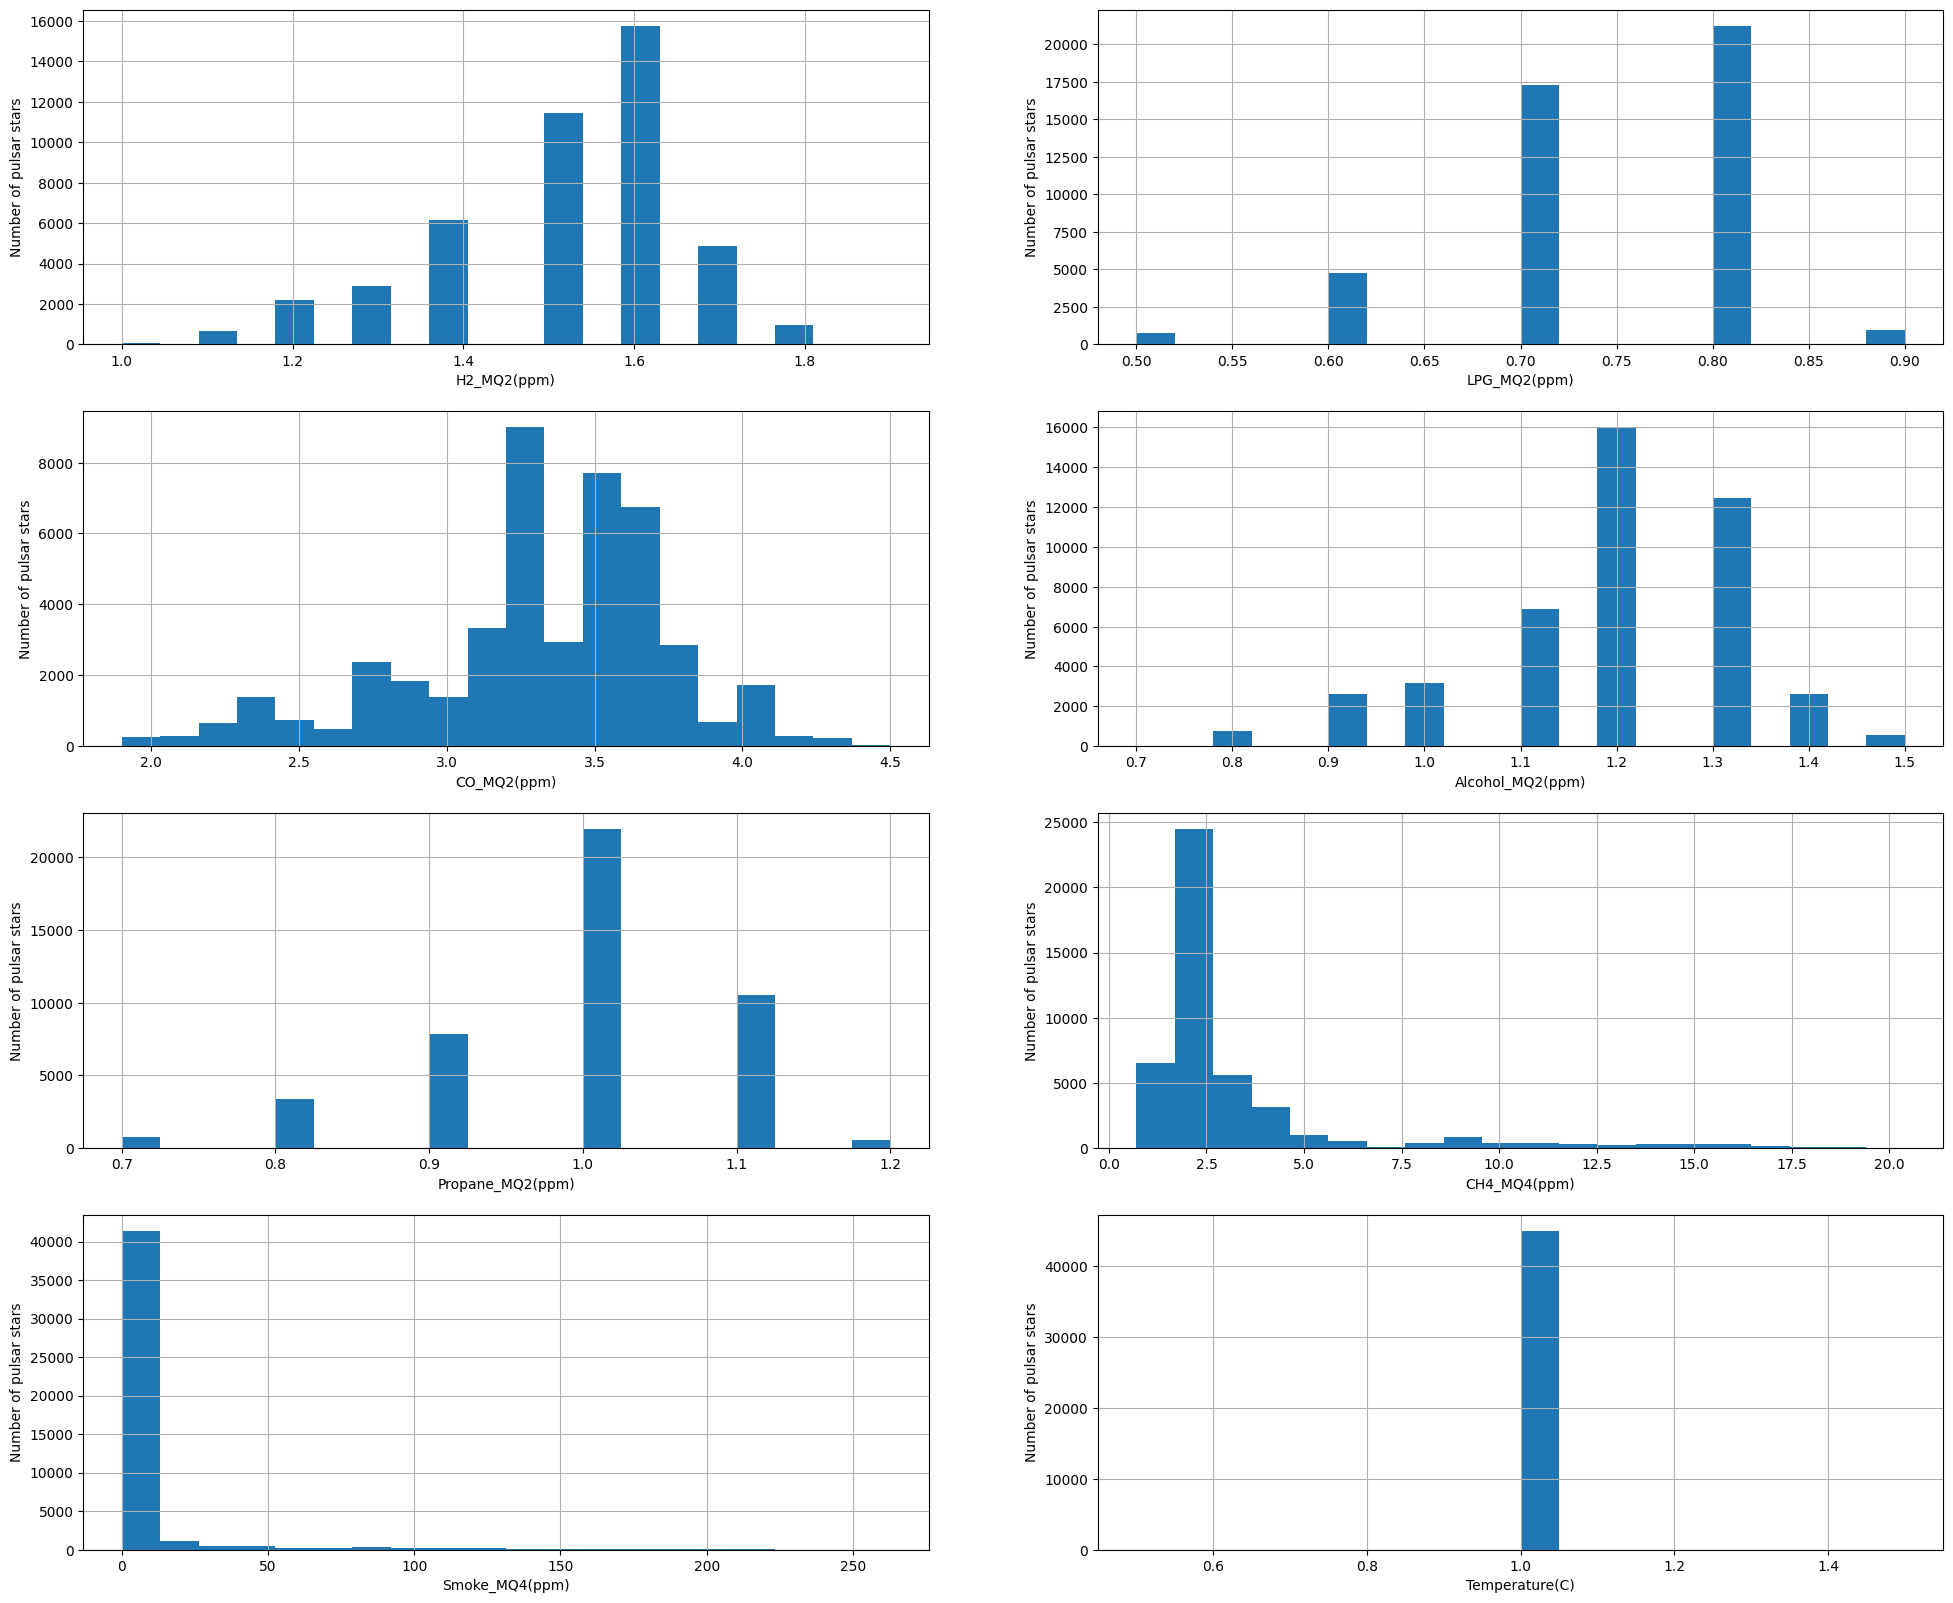

In [82]:
plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = dataset['H2_MQ2(ppm)'].hist(bins=20)
fig.set_xlabel('H2_MQ2(ppm)')
fig.set_ylabel('Number of pulsar stars')


plt.subplot(4, 2, 2)
fig = dataset['LPG_MQ2(ppm)'].hist(bins=20)
fig.set_xlabel('LPG_MQ2(ppm)')
fig.set_ylabel('Number of pulsar stars')


plt.subplot(4, 2, 3)
fig = dataset['CO_MQ2(ppm)'].hist(bins=20)
fig.set_xlabel('CO_MQ2(ppm)')
fig.set_ylabel('Number of pulsar stars')



plt.subplot(4, 2, 4)
fig = dataset['Alcohol_MQ2(ppm)'].hist(bins=20)
fig.set_xlabel('Alcohol_MQ2(ppm)')
fig.set_ylabel('Number of pulsar stars')



plt.subplot(4, 2, 5)
fig = dataset['Propane_MQ2(ppm)'].hist(bins=20)
fig.set_xlabel('Propane_MQ2(ppm)')
fig.set_ylabel('Number of pulsar stars')



plt.subplot(4, 2, 6)
fig = dataset['CH4_MQ4(ppm)'].hist(bins=20)
fig.set_xlabel('CH4_MQ4(ppm)')
fig.set_ylabel('Number of pulsar stars')



plt.subplot(4, 2, 7)
fig = dataset['Smoke_MQ4(ppm)'].hist(bins=20)
fig.set_xlabel('Smoke_MQ4(ppm)')
fig.set_ylabel('Number of pulsar stars')


plt.subplot(4, 2, 8)
fig = dataset['Temperature(C)'].hist(bins=20)
fig.set_xlabel('Temperature(C)')
fig.set_ylabel('Number of pulsar stars')

In [83]:
X = dataset.drop(['label'], axis=1)

y = dataset['label']

In [84]:
#split train n test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [85]:
X_train.shape, X_test.shape

((36000, 8), (9000, 8))

In [86]:
cols = X_train.columns

In [88]:
print(y.head(5))

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64


Text(0.5, 1.0, 'testing')

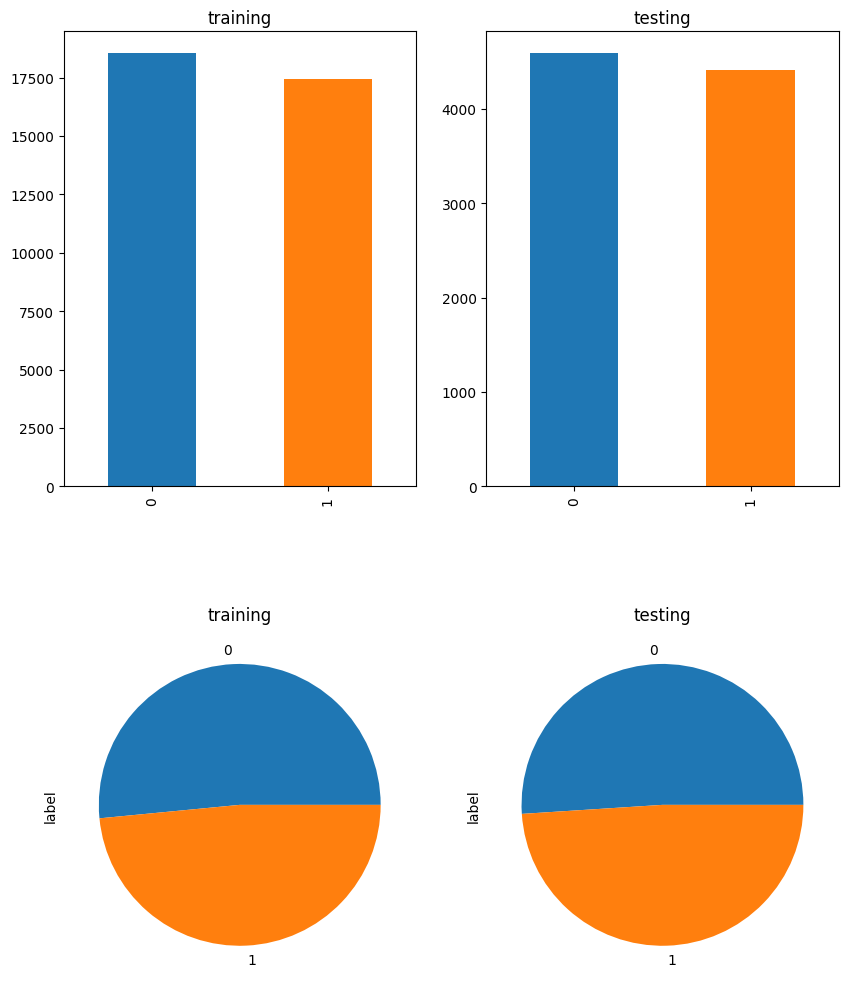

In [89]:
#SPLITTING VISUALIZATION
plt.figure(figsize=(10,13))
plt.subplot(2,2,1);y_train.value_counts().plot(kind='bar', color=['C0','C1','C2','C3','C4','C5','C6']);plt.title('training')
plt.subplot(2,2,2);y_test.value_counts().plot(kind='bar', color=['C0','C1','C2','C3','C4','C5','C6']);plt.title('testing')
plt.subplot(2,2,3);y_train.value_counts().plot(kind='pie');plt.title('training')
plt.subplot(2,2,4);y_test.value_counts().plot(kind='pie',);plt.title('testing')

In [90]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=[cols])

X_test = pd.DataFrame(X_test, columns=[cols])

X_train.describe()

,H2_MQ2(ppm),LPG_MQ2(ppm),CO_MQ2(ppm),Alcohol_MQ2(ppm),Propane_MQ2(ppm),CH4_MQ4(ppm),Smoke_MQ4(ppm),Temperature(C)
count,3.600000e+04,3.600000e+04,3.600000e+04,3.600000e+04,3.600000e+04,3.600000e+04,3.600000e+04,36000.0
mean,-1.223712e-17,-1.770781e-15,6.408701e-16,6.152116e-16,1.041340e-15,4.855375e-17,1.519772e-17,0.0
std,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,0.0
min,-3.587193e+00,-3.097029e+00,-3.285611e+00,-3.626613e+00,-3.053955e+00,-8.539569e-01,-2.629997e-01,0.0
25%,-8.035011e-01,-4.925077e-01,-5.064124e-01,-6.652733e-01,-9.371955e-01,-4.740423e-01,-2.539353e-01,0.0
50%,-1.075781e-01,-4.925077e-01,1.883872e-01,7.506175e-02,1.211845e-01,-3.013538e-01,-2.448708e-01,0.0
75%,5.883449e-01,8.097529e-01,6.515869e-01,8.153968e-01,1.211845e-01,9.485393e-03,-2.176775e-01,0.0
max,2.676114e+00,2.112014e+00,2.735986e+00,2.296067e+00,2.237944e+00,5.949968e+00,1.164767e+01,0.0


In [91]:
#choose method
RF =  RandomForestClassifier()

kfold=KFold(n_splits=5, shuffle=True, random_state=0)

RF.fit(X_train,y_train)
y_pred=RF.predict(X_test)


#crossvalidation
accuracy = cross_val_score(RF,X,y, cv=kfold, scoring='accuracy')
precision = cross_val_score(RF,X,y, cv=kfold, scoring='precision_weighted')
recall = cross_val_score(RF,X,y, cv=kfold, scoring='recall_weighted')
f1 = cross_val_score(RF,X,y, cv=kfold, scoring='f1_weighted')
print('accuray',  accuracy.mean())
print('precision' , precision.mean())
print('recall' ,recall.mean())
print('F1-Score' , f1.mean())

accuray 0.8863555555555556
precision 0.8864638647179444
recall 0.8862222222222222
F1-Score 0.8860323764545075


              precision    recall  f1-score   support

           0       0.90      0.88      0.89      4592
           1       0.88      0.89      0.89      4408

    accuracy                           0.89      9000
   macro avg       0.89      0.89      0.89      9000
weighted avg       0.89      0.89      0.89      9000



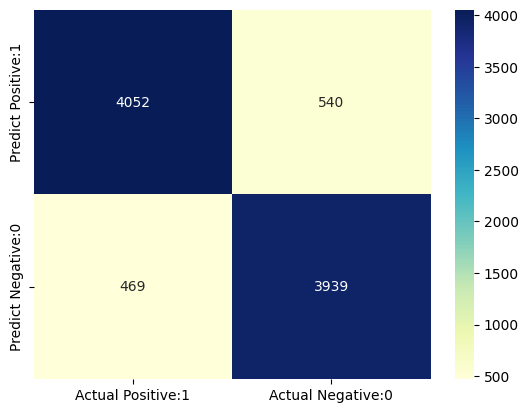

In [92]:
from sklearn.metrics import classification_report

cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

print(classification_report(y_test, y_pred))

In [93]:
#choose method
RF =  RandomForestClassifier()

kfold=KFold(n_splits=5, shuffle=True, random_state=0)

RF.fit(X_train,y_train)
y_pred=RF.predict(X_test)


#crossvalidation
accuracy = cross_val_score(RF,X,y, cv=kfold, scoring='accuracy')
precision = cross_val_score(RF,X,y, cv=kfold, scoring='precision_weighted')
recall = cross_val_score(RF,X,y, cv=kfold, scoring='recall_weighted')
f1 = cross_val_score(RF,X,y, cv=kfold, scoring='f1_weighted')
print('Menggunakan Metode RandomForest')
print('accuray',  accuracy.mean())
print('precision' , precision.mean())
print('recall' ,recall.mean())
print('F1-Score' , f1.mean())

Menggunakan Metode RandomForest
accuray 0.885911111111111
precision 0.8864191182681553
recall 0.8859999999999999
F1-Score 0.8861884433401019


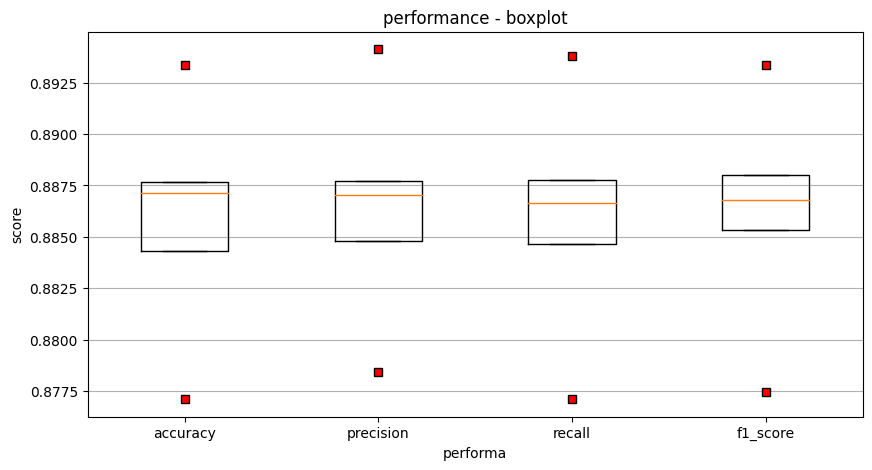

In [94]:
#BOXPLOT VISUALIZATION

fig1, ax1 = plt.subplots(figsize=(10,5))

#green_diamond = dict(markerfacecolor='g', marker='D')
red_square = dict(markerfacecolor='r', marker='s')


# grouping
all_data = [accuracy,precision,recall,f1]
ax1.set_title('performance - boxplot')

# plot box plot
ax1.boxplot(all_data,notch=False,flierprops=red_square)




#adding horizontal grid lines
ax1.yaxis.grid(True)
ax1.set_xticks([y +1 for y in range(len(all_data))])
ax1.set_xlabel('performa')
ax1.set_ylabel('score')

#add x-tick labels
plt.setp(ax1, xticks=[y+1 for y in range(len(all_data))],
         xticklabels=[ 'accuracy','precision','recall','f1_score'])
plt.show()

In [95]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint
import pickle
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import accuracy_score
# import packages for hyperparameters tuning
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold, KFold, GridSearchCV
from sklearn.metrics import f1_score, roc_auc_score,accuracy_score,confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, classification_report 

In [96]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.9/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['clf', 'fmin', 'cm', 'randint']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [97]:
filename = 'rf_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [98]:
filename = 'rf_model.sav'

In [99]:
rf_load = pickle.load(open(filename, 'rb'))